<a href="https://colab.research.google.com/github/Danie110001001109192912/Carlos_Daniel_Duarte/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/cancer de mama.csv')


df.info()

# sem erros de categorias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.duplicated(subset=['id']).sum()
df.duplicated().sum()


# sem valores duplicados no Id nem em todo o Dataframe. Poderia haver valores duplicados em outras colunas mas não no Id

0

In [ ]:
df.isnull().sum()

# sem valores nulos

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop( columns= ['Unnamed: 32', 'id'] )
df.info()

# coluna com valor nulo e Id retirada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Renomendo coluna do alvo


In [ ]:
df.rename(columns={'diagnosis': 'DIAGNOSIS'}, inplace=True)

### tratando outliers

In [ ]:
df.describe() # ver estatísticas pra identificar outliers

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analisys- EDA

<Axes: >

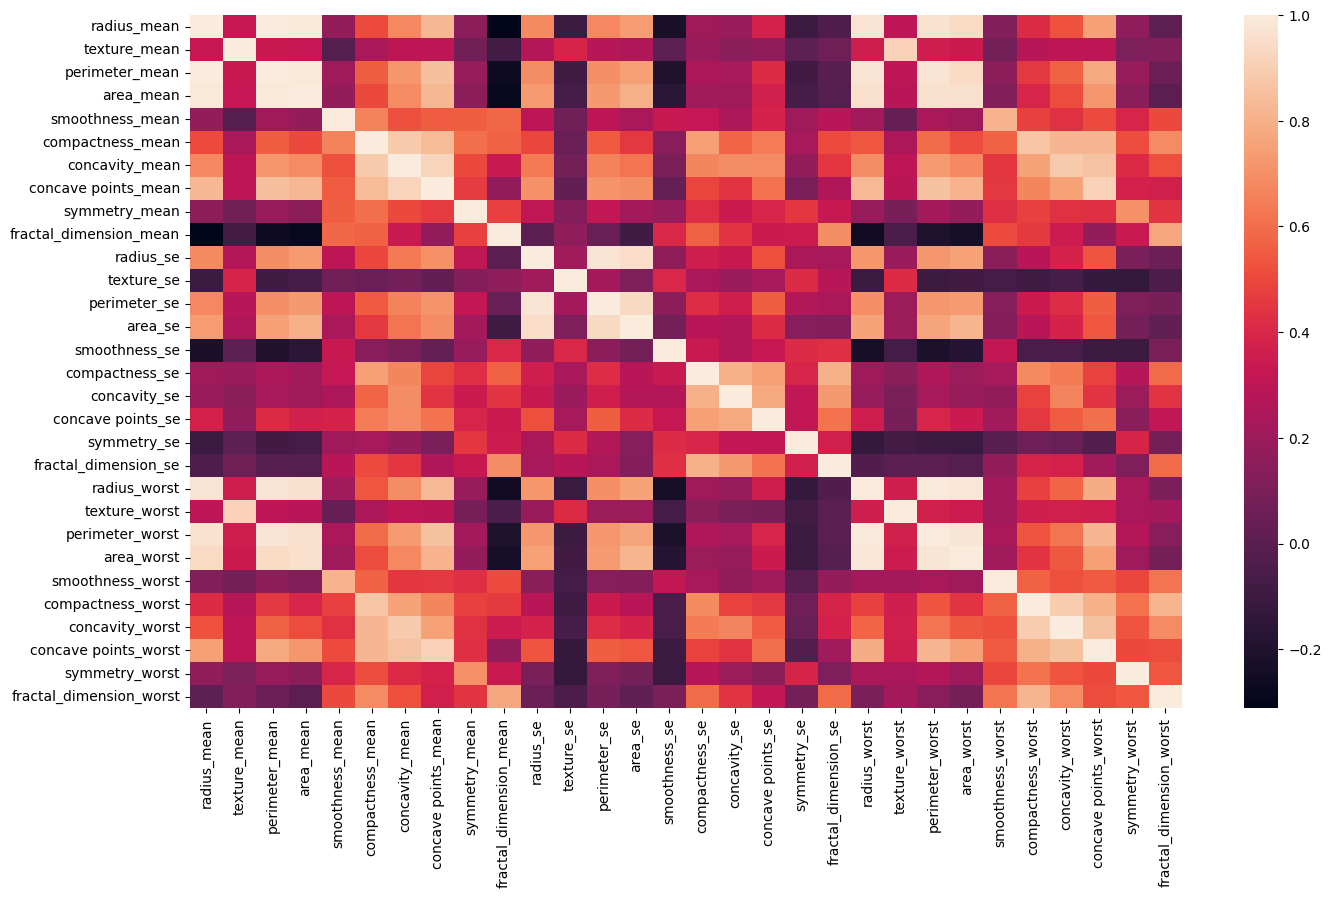

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr())


# obviamente não vou ter variaveis categoricas aqui, por iss não acho a correlação com o diagnostico

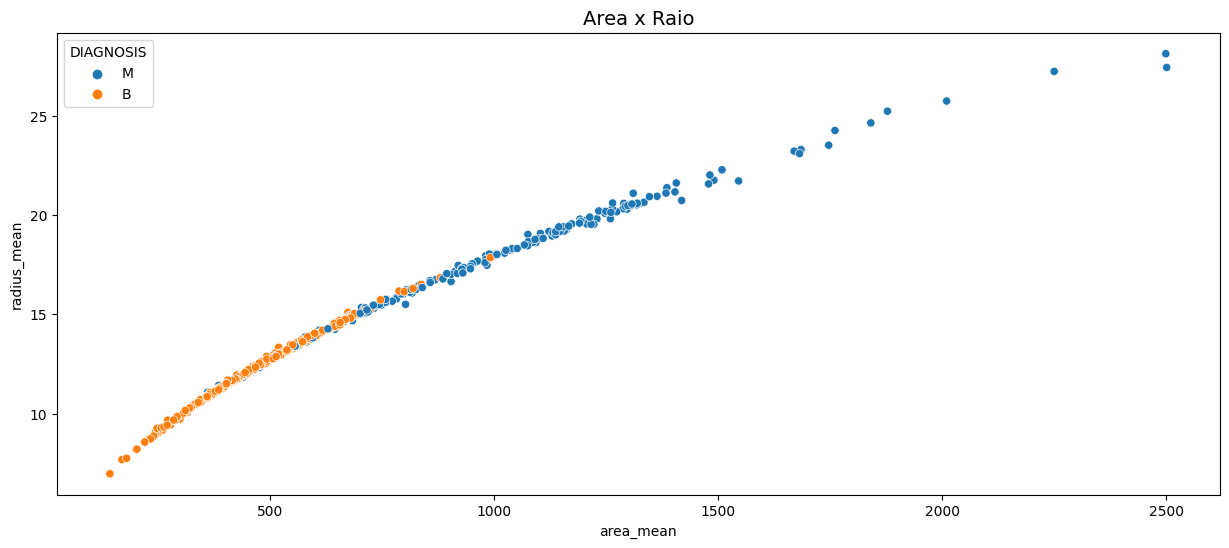

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(df,y  = 'radius_mean', x = 'area_mean', hue = 'DIAGNOSIS')
plt.title('Area x Raio', fontsize = 14)
plt.show()

# Da pra ver que uma area média maior que 1000 indica tumor maligno

<Axes: xlabel='DIAGNOSIS', ylabel='area_mean'>

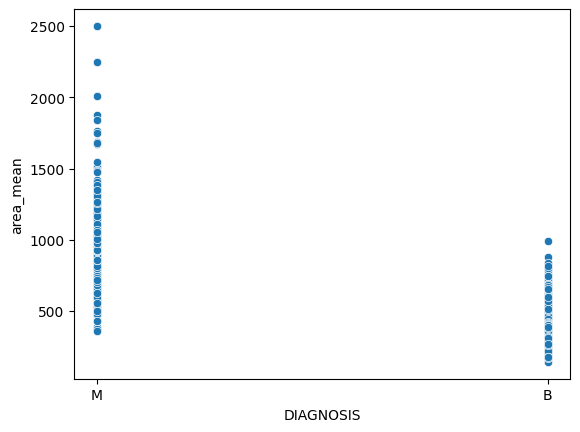

In [ ]:
sns.scatterplot(df, y = 'area_mean', x = 'DIAGNOSIS')

In [ ]:
import scipy.stats as stats
df.columns.tolist()

['DIAGNOSIS',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

1001.6


<Axes: >

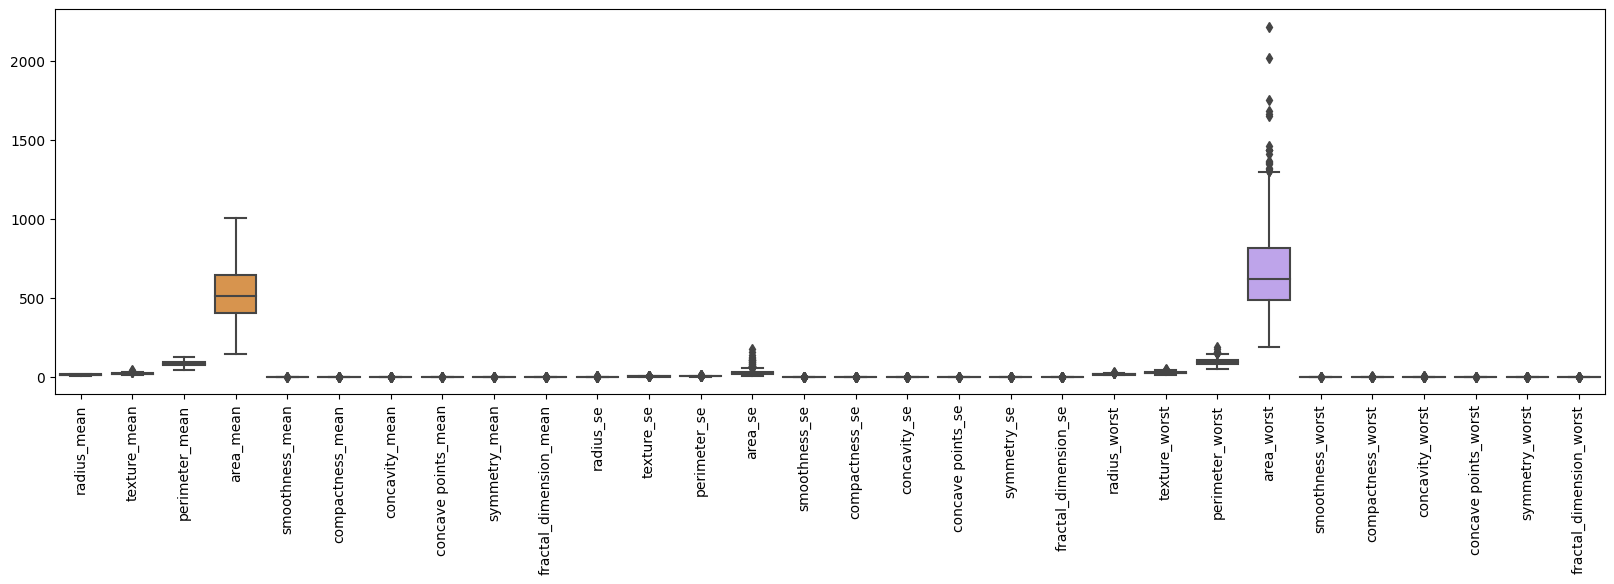

In [ ]:
f6 = df['area_mean'].quantile(0.84)

print(f6)
cd = df[ df['area_mean'] < f6 ]
plt.figure( figsize = (20,5))
plt.xticks(rotation=90)
sns.boxplot(cd)

 Foi de 4254.0 para 1298.6799999999998 amostras


<Axes: >

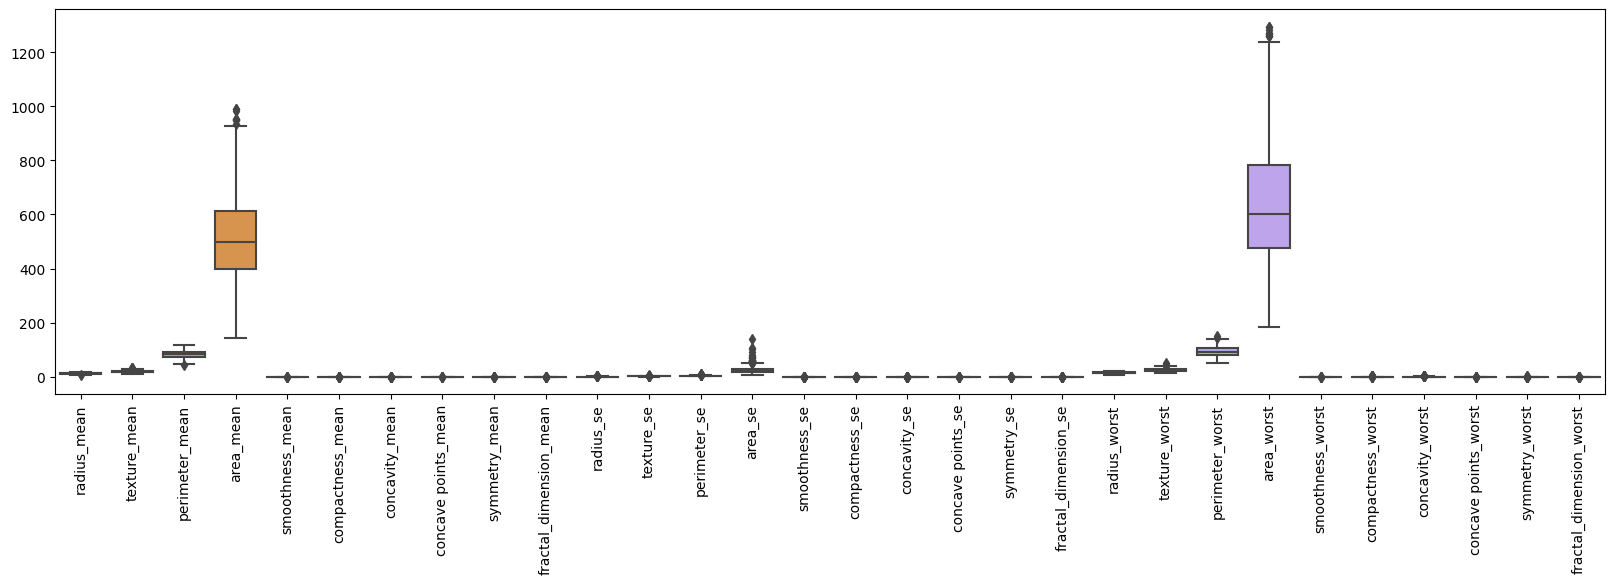

In [ ]:
antes = df['area_worst'].quantile(1)
y = cd['area_worst'].quantile(0.96)

print(f' Foi de {antes} para {y} amostras')
cd = cd[ cd['area_worst'] < y ]
plt.figure( figsize = (20,5))
plt.xticks(rotation=90)
sns.boxplot(cd)

 Foi de 542.2 para 78.03020000000001 amostras


<Axes: >

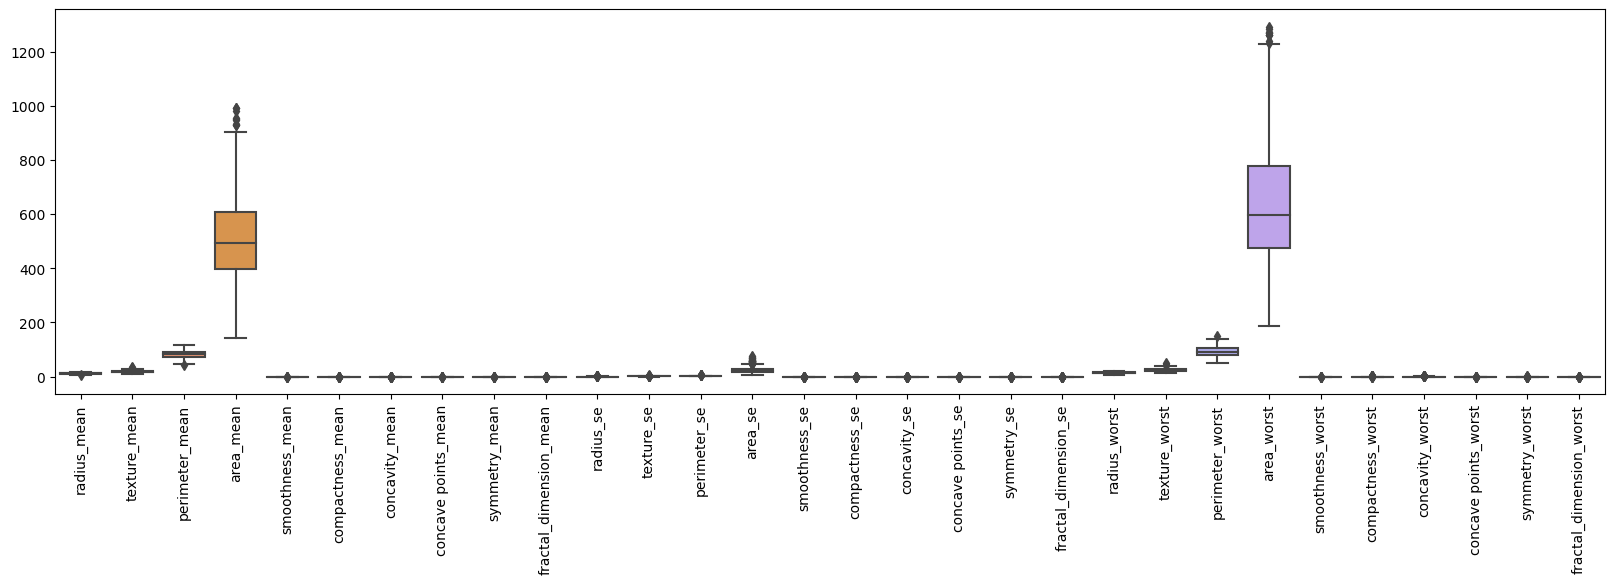

In [ ]:
antes = df['area_se'].quantile(1)
y = cd['area_se'].quantile(0.99)

print(f' Foi de {antes} para {y} amostras')
cd = cd[ cd['area_se'] < y ]
plt.figure( figsize = (20,5))
plt.xticks(rotation=90)
sns.boxplot(cd)

<Axes: xlabel='x', ylabel='y'>

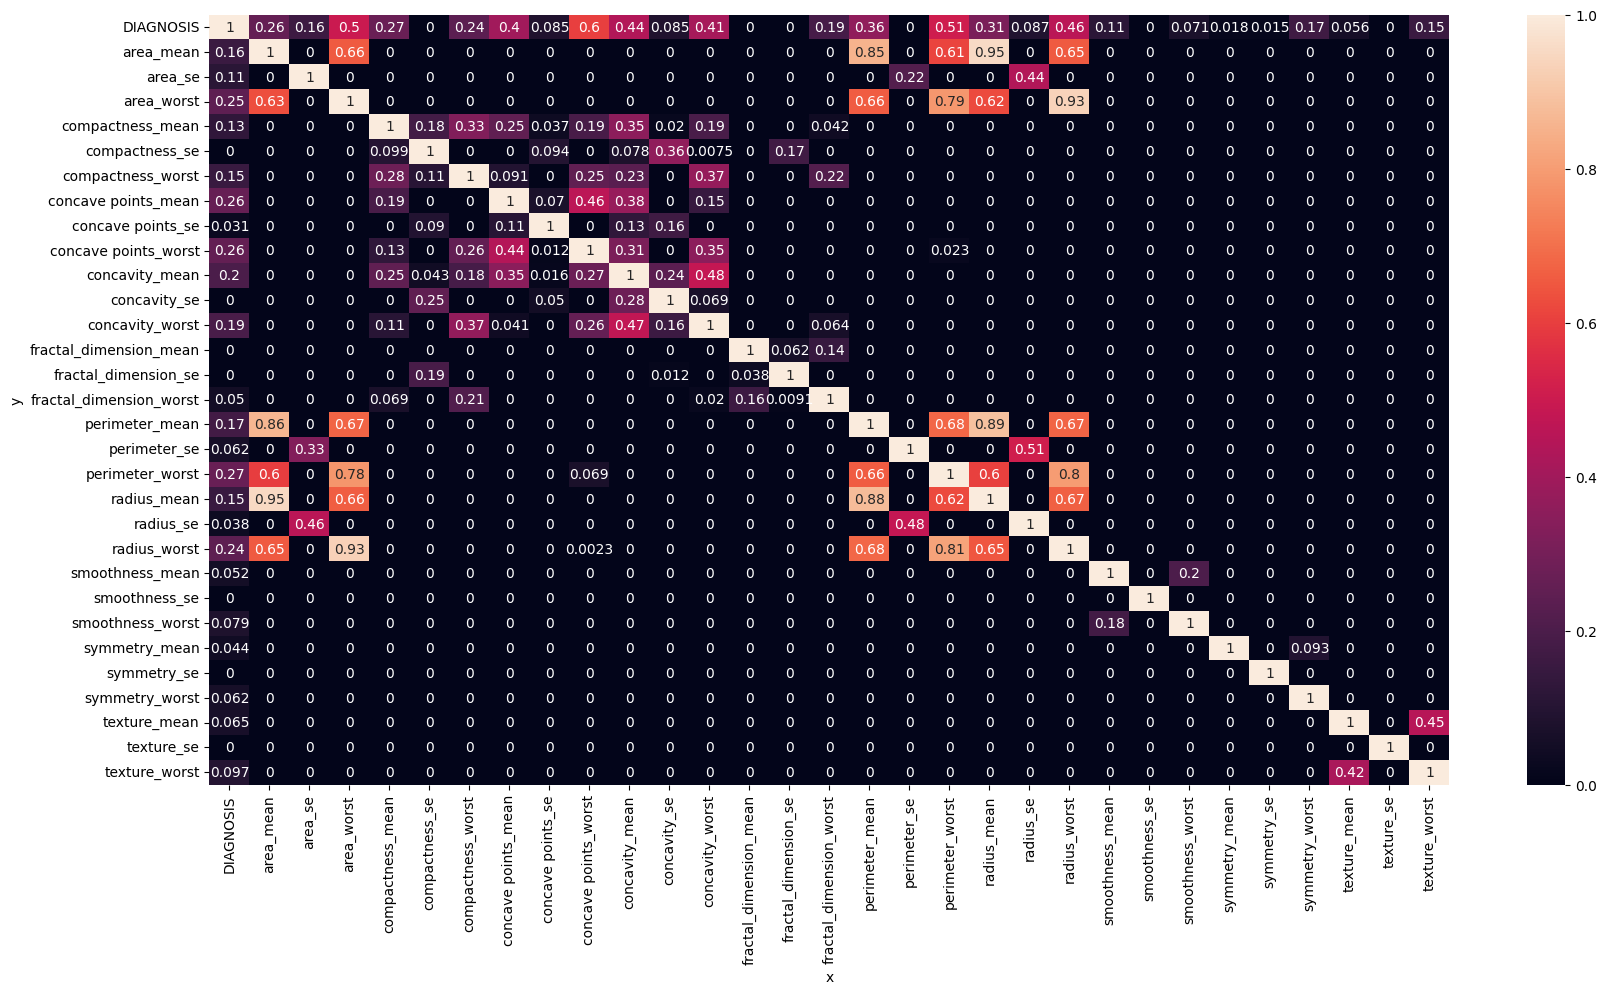

In [ ]:
plt.figure( figsize = (20, 10))
matrix_df = pps.matrix(cd)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, annot = True)

In [ ]:
out = ['area_mean' , 'area_se' , 'area_worst' , 'perimeter_mean' , 'perimeter_worst']

In [ ]:
out = ['area_mean' , 'area_se' , 'area_worst' , 'perimeter_mean' , 'perimeter_worst']

for v in df[out]:
  
  df_mean , df_std = np.mean(df[v]) , np.std(df[v])
  low, up = df[v] - (3 * df_std) , df[v] + (3 * df_std)

  outliers = ( df[v] < low ) | ( df[v] > up)

  print(f' O número de outlier em {v} é {outliers.sum()} ')



 O número de outlier em area_mean é 0 
 O número de outlier em area_se é 0 
 O número de outlier em area_worst é 0 
 O número de outlier em perimeter_mean é 0 
 O número de outlier em perimeter_worst é 0 


In [ ]:
out = ['area_mean' , 'area_se' , 'area_worst' , 'perimeter_mean' , 'perimeter_worst']
outliers = []
for val in df[out]:
  
  df_mean , df_std = np.mean(df[val]) , np.std(df[val])
  z_score = (df[val] - df_mean) / df_std 

  for v in z_score:
    if v > 3:
      print(v)
      print( '    ')
      

3.4786528969666866
    
3.145892891170634
    
4.536659069241315
    
5.244840620038042
    
3.1060754545796536
    
3.854074441967361
    
5.250528825265325
    
3.373421100261952
    
4.238913644279437
    
10.676613884849093
    
3.5062567132781743
    
4.0430984284863065
    
11.041842264867741
    
3.0772233753044618
    
3.048953465160939
    
4.105459004547587
    
3.62730674712135
    
4.485168150150775
    
3.560506064098567
    
4.137101433347852
    
3.9771313766353984
    
5.93017239869624
    
3.3425248879189593
    
3.0964171083613374
    
3.2758964397650563
    
3.057588378499899
    
3.7125125622953687
    
3.9761298438231054
    
3.3871099804095692
    
3.9102255234411714
    
3.0287552383328036
    
3.1107968448498573
    
3.3818479744870684
    
3.179304273219702
    
3.635027601071276
    
4.287337462505881
    
3.1048396771655233
    


In [ ]:
out = ['area_mean' , 'area_se' , 'area_worst' , 'perimeter_mean' , 'perimeter_worst']


Dados com outliers provaveis outliers  não confirmados por texte estatísticos


```
out = ['area_mean' , 'area_se' , 'area_worst' , 'perimeter_mean' , 'perimeter_worst']
```


In [ ]:
df.loc[  df['DIAGNOSIS'] == 'M' , 'DIAGNOSIS' ] = 1
df.loc[  df['DIAGNOSIS'] == 'B' , 'DIAGNOSIS' ] = 0

df.head()

,DIAGNOSIS,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 > Divindo dentre treino **X** / teste **Y**

In [ ]:

X = df.drop('DIAGNOSIS', 1) # pode apenas passar o eixo no caso o eixo 1 
X.columns

<ipython-input-32-835fbaf7999d>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('DIAGNOSIS', 1) # pode apenas passar o eixo no caso o eixo 1


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
Y = df['DIAGNOSIS']
Y = Y.astype('int64')
Y.value_counts()

0    357
1    212
Name: DIAGNOSIS, dtype: int64

> Train_test_split 

- pq dividiu em cima se essa junçãõ ja faz ?
pq essa função não vai dividir o dataset todo precisa dos parâmetro

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size=0.33, random_state=42)

X_train.shape, X_test.shape ,  y_train.shape, y_test.shape


((381, 30), (188, 30), (381,), (188,))

> Scaler

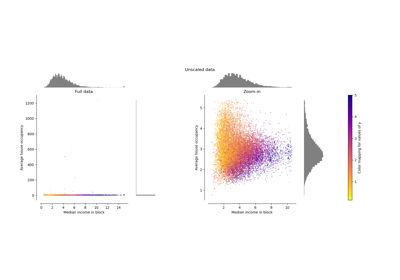

tem o sandart e o robust ( para ouliers)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# treinou e trasformar o X de treino
X_train_scaled = scaler.fit_transform(X_train) # pq treinar, treinar o quê ?

# apenas trasformar o X test ( é o que o modelo vai usar pra aprender, então ele apenas será trasformado mas não treinado)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled.shape

> Pickle

* ferramenta para salvar/ armagenar a IA

In [ ]:
import pickle

# ta mas o que essa codifo faz e como funciona ?
pickle.dump(scaler, open('scaler.pkl' , 'wb'))

> scaler perde interpretabilidade

```

 devolve um array

 X_train_scaled



array([[ 0.35581987, -1.72664707,  0.41303118, ...,  1.05652305,
         0.51844283,  0.98925483],
       [-0.37326674,  0.50881308, -0.39469992, ..., -0.89667412,
        -0.63236707, -0.11469617],
       [ 1.4033581 , -0.15144941,  1.34799923, ...,  1.46353548,
         1.02587412, -0.03369823],
       ...,
       [ 0.02898794, -0.56411347, -0.0829084 , ..., -1.2463348 ,
        -0.67979055, -1.26509354],
       [-0.05760855,  0.09614902, -0.04957475, ...,  1.05652305,
         0.45995387,  1.24414347],
       [-0.5604269 ,  0.30837625, -0.61462066, ..., -0.6145405 ,
        -0.30672581, -0.8357478 ]])
```
> É preciso retrasformar 

In [ ]:
# como funciona exatamente o comando pd.dataframe(data) ?

X_train_scaled = pd.DataFrame(X_train_scaled,  columns = X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,  columns = X.columns)

X_train_scaled.shape


(381, 30)

# Machine Learning

> Filtrado e prétratado = X_ts

> pretrateado = X_train_scaled, X_test_scaled

## SVM 
Suport vector machine

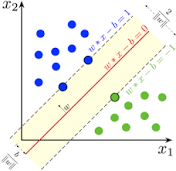

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability = True)

svc.fit(X_train_scaled, y_train)


SVC(probability=True)

In [ ]:
pred = svc.predict(X_test_scaled)
print(f'Predição de cada um dos valores preditos apartir do conjunto de treino é  {pred[:10]}')

Predição de cada um dos valores preditos apartir do conjunto de treino é  [0 1 1 0 0 1 1 1 1 0]


In [ ]:
prob = svc.predict_proba(X_test_scaled)
print(f'Provabilidade de cada um dos valores preditos ser verdadeiros é {prob[:10]}')

Provabilidade de cada um dos valores preditos ser verdadeiros é [[9.72799167e-01 2.72008330e-02]
 [8.31068752e-07 9.99999169e-01]
 [2.91384134e-03 9.97086159e-01]
 [9.99699469e-01 3.00531086e-04]
 [9.99837016e-01 1.62983790e-04]
 [2.50798210e-02 9.74920179e-01]
 [1.50465294e-05 9.99984953e-01]
 [1.08508989e-01 8.91491011e-01]
 [3.37914586e-01 6.62085414e-01]
 [9.86201223e-01 1.37987770e-02]]


> Report

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[117,   4],
       [  2,  65]])

<Axes: >

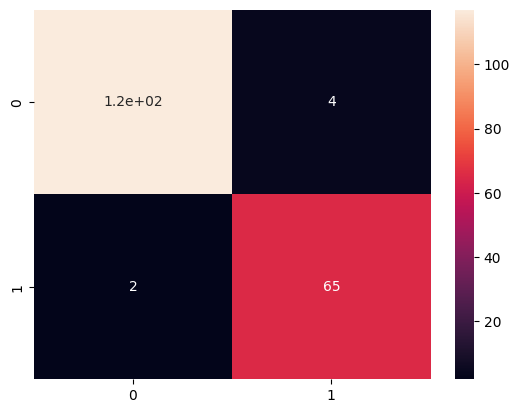

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred ))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       121
           1       0.94      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



> 